In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import array as arr
import os
import json
import time
import math
import csv
from datetime import datetime
import pandas as pd

In [47]:
# read all files, changing times into correct ones
#10357 files
headerList=['id','Time','Longitude','Latitude']
'''
for i in range(10357):
    if(i!=294 and i!=533 and i!=949 and i!=1088 and i!=1496 and i!=1946 and i!=2928 and i!=2944 and i!=3049 and i!=3159 and i!=3193 and i!=3949 and i!=4111 and i!=4176 and i!=4797 and i!=5069 and i!=5074 and i!=5098 and i!=5859 and i!=5971 and i!=6029 and i!=6210 and i!=6235 and i!=6274 and i!=6321 and i!=6655 and i!=6664 and i!=6716 and i!=7104 and i!=7145 and i!=7582 and i!=7629 and i!=7970 and i!=8125 and i!=8178 and i!=8208 and i!=8423 and i!=8553 and i!=8661 and i!=8695 and i!=8716 and i!=9108 and i!=9753 and i!=9873 and i!=10114 and i!=10351):
        filename = 'taxi_by_id/'
        filename += str(i+1)
        filename +='.txt'
        #print(filename)
        data= pd.read_csv(filename)
        dest='taxi_csv/'
        dest += str(i+1)
        dest +='.cvs'
        data.to_csv(dest,header=headerList,index=None)
'''
# this module is only used for data preparation, take away is below: 
#this is car id-1 instead of car id
nonTaxi=[294,533,949,1088,1496,1946,2928,2944,3049,3159,3193,3949,4111,4176,4797,5069,5074,5098,5859,5971,6029,6210,6235,6274,6321,6655,6664,6716,7104,7145,7582,7629,7970,8125,8178,8208,8423,8553,8661,8695,8716,9108,9753,9873,10114,10351]

In [48]:
#change Time into timestamp-->delete repeated data-->even Interval
import os
import json
import time
import math
import matplotlib.pyplot as plt
import csv
import numpy as np
import array as arr
nonTaxi.append(740)
nonTaxi.append(1275)
nonTaxi.append(1276)
nonTaxi.append(2508)
nonTaxi.append(2559)
nonTaxi.append(3780)
nonTaxi.append(3578)
nonTaxi.append(3556)
nonTaxi.append(3014)
tooSmallList=[1275,2508,3242,4250,5763,6424,6803,6955,7358,7631,9429,9748,10239,10259,10263]
nonTaxi=nonTaxi+tooSmallList
#10357 files
'''
for i in range(10357):
    if(i not in nonTaxi and i>9948):
        
        filename = 'taxi_csv/'
        filename += str(i+1)
        filename +='.cvs'
        data= pd.read_csv(filename)
        Longitude=data["Longitude"]
        Latitude=data["Latitude"]
        Timedata=pd.to_datetime(data["Time"])
        index=0
        for item in Timedata:
            result = datetime.strptime(str(item), '%Y-%m-%d %H:%M:%S')
            result = datetime.timestamp(result)
            Timedata[index]=result
            index =index+1
        
        k=0
        timemode= Timedata[0]
        for ts in Timedata:
            ts=ts-timemode
            Timedata[k]=ts+1
            k=k+1
        #print(len(Timedata),len(Longitude),len(Latitude))
        
        
        combinedTime=[]
        combinedLon=[]
        combinedLan=[]
        # combine same time terms
        nextId=0
        for q in range(len(Timedata)):
            if(q>=nextId):
                totalLan=float(Latitude[q])
                totalLon=float(Longitude[q])
                totalitem=1
                compareIndex=q+1
                while (compareIndex<len(Timedata))and(Timedata[compareIndex]==Timedata[q]):
                    totalLan=totalLan+float(Latitude[compareIndex])
                    totalLon=totalLon+float(Longitude[compareIndex])
                    compareIndex=compareIndex+1
                    totalitem=totalitem+1
                combinedTime.append(Timedata[q])
                combinedLon.append(totalLon/totalitem)
                combinedLan.append(totalLan/totalitem)
                nextId=q+totalitem
                
        #print(len(combinedTime),len(combinedLon),len(combinedLan))
        #change to even interval
        timenow=1
        evenTime=[]
        evenTime.append(timenow)
        for item in combinedTime:
            while item>=(timenow+60):
                timenow=timenow+60
                evenTime.append(timenow)
        
    
        #print(evenTime)
        for i in range(len(evenTime)-1):
            if (evenTime[i+1]-evenTime[i])!=60:
                ifeven=False
                falseindex=i
                print(ifeven)
                print(falseindex)
        
        evenLan=[]
        evenLon=[]
        for t in evenTime:
            evenLan.append(0)
            evenLon.append(0)

        for t in range(len(evenTime)):
            for j in range(len(combinedTime)):
                if evenTime[t]==combinedTime[j]:
                    evenLan[t]=combinedLan[j]
                    evenLon[t]=combinedLon[j] 
        for t in range(len(evenLan)):
            if (evenLan[t]==0) or (evenLon[t]==0):
                for j in range(len(combinedTime)):
                    if (combinedTime[j-1]<evenTime[t]) and (combinedTime[j]>evenTime[t]):
                        evenLon[t]=(combinedLon[j]-combinedLon[j-1])/(combinedTime[j]-combinedTime[j-1])*(evenTime[t]-combinedTime[j-1])+combinedLon[j-1]
                        evenLan[t]=(combinedLan[j]-combinedLan[j-1])/(combinedTime[j]-combinedTime[j-1])*(evenTime[t]-combinedTime[j-1])+combinedLan[j-1]
                
        
        idlist=[]
        for t in range(len(evenLan)):
            idlist.append(str(i+1))
        
        filename = 'taxi_even/'
        filename += str(i+1)
        filename +='.csv'
        print(i+1)
        with open(filename,'w',newline='') as file:
            writer=csv.writer(file)
            writer.writerow(headerList)
            for j in zip(idlist,evenTime,evenLon,evenLan):
                writer.writerow(j)  

'''
# this module is only used for data preparation, it is time consuming and we only need to run it once: 

'\nfor i in range(10357):\n    if(i not in nonTaxi and i>9948):\n        \n        filename = \'taxi_csv/\'\n        filename += str(i+1)\n        filename +=\'.cvs\'\n        data= pd.read_csv(filename)\n        Longitude=data["Longitude"]\n        Latitude=data["Latitude"]\n        Timedata=pd.to_datetime(data["Time"])\n        index=0\n        for item in Timedata:\n            result = datetime.strptime(str(item), \'%Y-%m-%d %H:%M:%S\')\n            result = datetime.timestamp(result)\n            Timedata[index]=result\n            index =index+1\n        \n        k=0\n        timemode= Timedata[0]\n        for ts in Timedata:\n            ts=ts-timemode\n            Timedata[k]=ts+1\n            k=k+1\n        #print(len(Timedata),len(Longitude),len(Latitude))\n        \n        \n        combinedTime=[]\n        combinedLon=[]\n        combinedLan=[]\n        # combine same time terms\n        nextId=0\n        for q in range(len(Timedata)):\n            if(q>=nextId):\n       

In [49]:
# calculate average of all Lon and Lat
#10357 files
# module only needed once for calculation of boundries
'''
totLat=0
totLon=0
totPoint=0
LLat=0
SLat=100000
LLon=0
SLon=100000
LLength=0
Timefortrain=[]

for i in range(10357):
    if(i not in nonTaxi):
        filename = 'taxi_even/'
        filename += str(i+1)
        filename +='.csv'
        data= pd.read_csv(filename)
        tmpLat=data["Latitude"]
        tmpLon=data["Longitude"]
        tmpLength=len(data["Time"])
        tmpTime=data["Time"]
        tmpLat = [j for j in tmpLat if ((j >= 38.45) and (j <= 41.05))]
        tmpLon = [j for j in tmpLon if ((j >= 115.416667) and (j <= 117.5)) ]
        if (len(tmpLat)!=0 and len(tmpLon)!=0):
            totLat += sum(tmpLat)/len(tmpLat)
            totLon += sum(tmpLon)/len(tmpLon)
            totPoint += 1
            if(tmpLength>LLength):
                LLength=tmpLength
                Timefortrain=tmpTime
                print(filename)
            if(max(tmpLat)>LLat):
                LLat=max(tmpLat)
            if(max(tmpLon)>LLon):
                LLon=max(tmpLon)
            if(min(tmpLat)<SLat):
                SLat=min(tmpLat)
            if(min(tmpLon)<SLon):
                SLon=min(tmpLon)
            
print(totLat/totPoint,totLon/totPoint,LLat,SLat,LLon,SLon)
latboundry1=(LLat-SLat)/3+SLat
latboundry2=2*(LLat-SLat)/3+SLat
lonboundry1=(LLon-SLon)/3+SLon
lonboundry2=2*(LLon-SLon)/3+SLon
print(latboundry1,latboundry2,lonboundry1,lonboundry2)
print(LLength)
'''

'\ntotLat=0\ntotLon=0\ntotPoint=0\nLLat=0\nSLat=100000\nLLon=0\nSLon=100000\nLLength=0\nTimefortrain=[]\n\nfor i in range(10357):\n    if(i not in nonTaxi):\n        filename = \'taxi_even/\'\n        filename += str(i+1)\n        filename +=\'.csv\'\n        data= pd.read_csv(filename)\n        tmpLat=data["Latitude"]\n        tmpLon=data["Longitude"]\n        tmpLength=len(data["Time"])\n        tmpTime=data["Time"]\n        tmpLat = [j for j in tmpLat if ((j >= 38.45) and (j <= 41.05))]\n        tmpLon = [j for j in tmpLon if ((j >= 115.416667) and (j <= 117.5)) ]\n        if (len(tmpLat)!=0 and len(tmpLon)!=0):\n            totLat += sum(tmpLat)/len(tmpLat)\n            totLon += sum(tmpLon)/len(tmpLon)\n            totPoint += 1\n            if(tmpLength>LLength):\n                LLength=tmpLength\n                Timefortrain=tmpTime\n                print(filename)\n            if(max(tmpLat)>LLat):\n                LLat=max(tmpLat)\n            if(max(tmpLon)>LLon):\n         

In [50]:
data= pd.read_csv('taxi_even/366.csv')
Timedata=data["Time"]
latb0=38.45000266666666
latb1=39.316663722222216
latb2=40.18332477777778
latb3=41.04998583333333
lonb0=115.41667538348354
lonb1=116.11111531084333
lonb2=116.80555523820313
lonb3=117.49999516556292
#print(Timedata)

In [51]:
#only needed for summarizing data into one cvs file
'''
A=[]
B=[]
C=[]
D=[]
E=[]
F=[]
G=[]
H=[]
I=[]

for i in range(len(Timedata)):
    A.append(0)
    B.append(0)
    C.append(0)
    D.append(0)
    E.append(0)
    F.append(0)
    G.append(0)
    H.append(0)
    I.append(0)
    

for i in range(10357):
    if(i not in nonTaxi):
        filename = 'taxi_even/'
        filename += str(i+1)
        filename +='.csv'
        data= pd.read_csv(filename)
        tmpTime=data["Time"]
        tmpLat=data["Latitude"]
        tmpLon=data["Longitude"]
        for j in range(len(tmpTime)):
            #if in region A
            if (tmpLat[j]>latb0 and tmpLat[j]<latb1 and tmpLon[j]>lonb2 and tmpLon[j]<lonb3):
                A[j] +=1
            #if in region B
            if tmpLat[j]>latb1 and tmpLat[j]<latb2 and tmpLon[j]>lonb2 and tmpLon[j]<lonb3:
                B[j] +=1
            #if in region C
            if tmpLat[j]>latb2 and tmpLat[j]<latb3 and tmpLon[j]>lonb2 and tmpLon[j]<lonb3:
                C[j] +=1
            #if in region D
            if tmpLat[j]>latb0 and tmpLat[j]<latb1 and tmpLon[j]>lonb1 and tmpLon[j]<lonb2:
                D[j] +=1
            #if in region E
            if tmpLat[j]>latb1 and tmpLat[j]<latb2 and tmpLon[j]>lonb1 and tmpLon[j]<lonb2:
                E[j] +=1
            #if in region F
            if tmpLat[j]>latb2 and tmpLat[j]<latb3 and tmpLon[j]>lonb1 and tmpLon[j]<lonb2:
                F[j] +=1
            #if in region G
            if tmpLat[j]>latb0 and tmpLat[j]<latb1 and tmpLon[j]>lonb0 and tmpLon[j]<lonb1:
                G[j] +=1
            #if in region H
            if tmpLat[j]>latb1 and tmpLat[j]<latb2 and tmpLon[j]>lonb0 and tmpLon[j]<lonb1:
                H[j] +=1
            #if in region I
            if tmpLat[j]>latb2 and tmpLat[j]<latb3 and tmpLon[j]>lonb0 and tmpLon[j]<lonb1:
                I[j] +=1
        print(filename)
print(A)
'''
            
        

'\nA=[]\nB=[]\nC=[]\nD=[]\nE=[]\nF=[]\nG=[]\nH=[]\nI=[]\n\nfor i in range(len(Timedata)):\n    A.append(0)\n    B.append(0)\n    C.append(0)\n    D.append(0)\n    E.append(0)\n    F.append(0)\n    G.append(0)\n    H.append(0)\n    I.append(0)\n    \n\nfor i in range(10357):\n    if(i not in nonTaxi):\n        filename = \'taxi_even/\'\n        filename += str(i+1)\n        filename +=\'.csv\'\n        data= pd.read_csv(filename)\n        tmpTime=data["Time"]\n        tmpLat=data["Latitude"]\n        tmpLon=data["Longitude"]\n        for j in range(len(tmpTime)):\n            #if in region A\n            if (tmpLat[j]>latb0 and tmpLat[j]<latb1 and tmpLon[j]>lonb2 and tmpLon[j]<lonb3):\n                A[j] +=1\n            #if in region B\n            if tmpLat[j]>latb1 and tmpLat[j]<latb2 and tmpLon[j]>lonb2 and tmpLon[j]<lonb3:\n                B[j] +=1\n            #if in region C\n            if tmpLat[j]>latb2 and tmpLat[j]<latb3 and tmpLon[j]>lonb2 and tmpLon[j]<lonb3:\n          

In [52]:
# same A-I to cvs
# only needed once
'''
headerList1=['Timedata','A','B','C','D','E','F','G','H','I']
with open('grid_traffic.csv','w',newline='') as file:
    writer=csv.writer(file)
    writer.writerow(headerList1)
    for j in zip(Timedata,A,B,C,D,E,F,G,H,I):
        writer.writerow(j)  
'''

"\nheaderList1=['Timedata','A','B','C','D','E','F','G','H','I']\nwith open('grid_traffic.csv','w',newline='') as file:\n    writer=csv.writer(file)\n    writer.writerow(headerList1)\n    for j in zip(Timedata,A,B,C,D,E,F,G,H,I):\n        writer.writerow(j)  \n"

In [53]:
# load from grid_traffic.csv
data= pd.read_csv('grid_traffic.csv')
Time=data["Timedata"]
A=data["A"].tolist()
B=data["B"].tolist()
C=data["C"].tolist()
D=data["D"].tolist()
E=data["E"].tolist()
F=data["F"].tolist()
G=data["G"].tolist()
H=data["H"].tolist()
I=data["I"].tolist()

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Activation
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import load_model


In [54]:
# produce the training sets for all [A-I]
#print(len(A))
#plt.figure(figsize=(15,10))
#plt.plot(A,label="A")
#plt.show()
#print(I)
N=[sum(A)/len(A),sum(B)/len(B),sum(C)/len(C),sum(D)/len(D),sum(E)/len(E),sum(F)/len(F),sum(G)/len(G),sum(H)/len(H),sum(I)/len(I)]
print(N)
train_Ax=[]
train_Ay=[]

train_Bx=[]
train_By=[]

train_Cx=[]
train_Cy=[]

train_Dx=[]
train_Dy=[]

train_Ex=[]
train_Ey=[]

train_Fx=[]
train_Fy=[]

train_Gx=[]
train_Gy=[]

train_Hx=[]
train_Hy=[]

train_Ix=[]
train_Iy=[]

tmpA=[number/N[0] for number in A]
tmpB=[number/N[1] for number in B]
tmpC=[number/N[2] for number in C]
tmpD=[number/N[3] for number in D]
tmpE=[number/N[4] for number in E]
tmpF=[number/N[5] for number in F]
tmpG=[number/N[6] for number in G]
tmpH=[number/N[7] for number in H]
tmpI=[number/N[8] for number in I]

n=300
x=8000

for i in range(n,x):
    train_Ax.append(tmpA[i-n:i])
    train_Ay.append(tmpA[i])
    train_Bx.append(tmpB[i-n:i])
    train_By.append(tmpB[i])
    train_Cx.append(tmpC[i-n:i])
    train_Cy.append(tmpC[i])
    train_Dx.append(tmpD[i-n:i])
    train_Dy.append(tmpD[i])  
    train_Ex.append(tmpE[i-n:i])
    train_Ey.append(tmpE[i])
    train_Fx.append(tmpF[i-n:i])
    train_Fy.append(tmpF[i])
    train_Gx.append(tmpG[i-n:i])
    train_Gy.append(tmpG[i])
    train_Hx.append(tmpH[i-n:i])
    train_Hy.append(tmpH[i]) 
    train_Ix.append(tmpI[i-n:i])
    train_Iy.append(tmpI[i]) 

train_Ax,train_Ay=np.array(train_Ax),np.array(train_Ay)
train_Ax=train_Ax.reshape(train_Ax.shape[0],train_Ax.shape[1],1)
train_Bx,train_By=np.array(train_Bx),np.array(train_By)
train_Bx=train_Bx.reshape(train_Bx.shape[0],train_Bx.shape[1],1)
train_Cx,train_Cy=np.array(train_Cx),np.array(train_Cy)
train_Cx=train_Cx.reshape(train_Cx.shape[0],train_Cx.shape[1],1)
train_Dx,train_Dy=np.array(train_Dx),np.array(train_Dy)
train_Dx=train_Dx.reshape(train_Dx.shape[0],train_Dx.shape[1],1)
train_Ex,train_Ey=np.array(train_Ex),np.array(train_Ey)
train_Ex=train_Ex.reshape(train_Ex.shape[0],train_Ex.shape[1],1)
train_Fx,train_Fy=np.array(train_Fx),np.array(train_Fy)
train_Fx=train_Fx.reshape(train_Fx.shape[0],train_Fx.shape[1],1)
train_Gx,train_Gy=np.array(train_Gx),np.array(train_Gy)
train_Gx=train_Gx.reshape(train_Gx.shape[0],train_Gx.shape[1],1)
train_Hx,train_Hy=np.array(train_Hx),np.array(train_Hy)
train_Hx=train_Hx.reshape(train_Hx.shape[0],train_Hx.shape[1],1)
train_Ix,train_Iy=np.array(train_Ix),np.array(train_Iy)
train_Ix=train_Ix.reshape(train_Ix.shape[0],train_Ix.shape[1],1)

print(train_Ax.shape)
print(train_Ay.shape)
print(train_Bx.shape)
print(train_By.shape)
print(train_Cx.shape)
print(train_Cy.shape)
print(train_Dx.shape)
print(train_Dy.shape)
print(train_Ex.shape)
print(train_Ey.shape)
print(train_Fx.shape)
print(train_Fy.shape)
print(train_Gx.shape)
print(train_Gy.shape)
print(train_Hx.shape)
print(train_Hy.shape)
print(train_Ix.shape)
print(train_Iy.shape)

[2.0820114748565643, 508.5208684891439, 374.1564855439307, 3.174485318933513, 8026.49746878164, 330.37979525255935, 6.919451006862414, 289.7706153673079, 64.49499381257735]
(7700, 300, 1)
(7700,)
(7700, 300, 1)
(7700,)
(7700, 300, 1)
(7700,)
(7700, 300, 1)
(7700,)
(7700, 300, 1)
(7700,)
(7700, 300, 1)
(7700,)
(7700, 300, 1)
(7700,)
(7700, 300, 1)
(7700,)
(7700, 300, 1)
(7700,)


257/257 [==============================] - 229s 881ms/step - loss: 0.0884


Text(0, 0.5, 'A density')

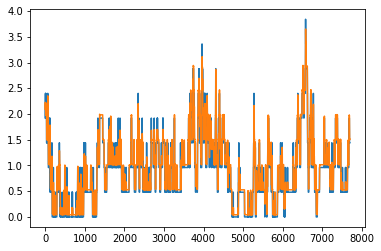

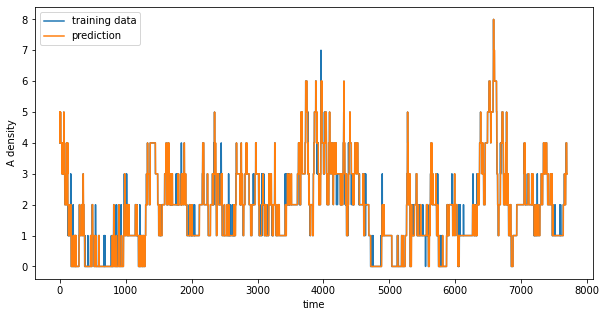

In [55]:
#training for A
regressor=Sequential()
regressor.add(LSTM(units=n,return_sequences=True,input_shape=(train_Ax.shape[1],train_Ax.shape[2])))
regressor.add(Dropout(0.05))
regressor.add(LSTM(units=n))
regressor.add(Dropout(0.05))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(train_Ax,train_Ay,epochs=1,batch_size=30)
regressor.save('A_model.h5')
model=load_model("A_model.h5")
predicted_values=model.predict(train_Ax)
plt.plot(train_Ay,label="training data")
plt.plot(predicted_values,label="prediction")
temp1=[]
temp2=[]
temp2 = [number*N[0] for number in train_Ay]
predicted_values=model.predict(train_Ax)
temp1 = [number*N[0] for number in predicted_values]
temp1=[np.round(number) for number in temp1]
plt.figure(figsize=(10,5))
plt.plot(temp2,label="training data")
plt.plot(temp1,label="prediction")
plt.legend()
plt.xlabel("time")
plt.ylabel("A density")

257/257 [==============================] - 384s 1s/step - loss: 0.0846


Text(0, 0.5, 'B density')

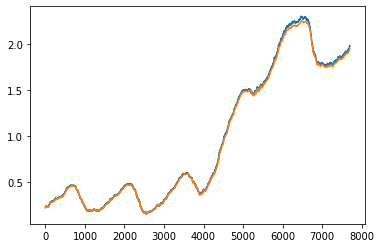

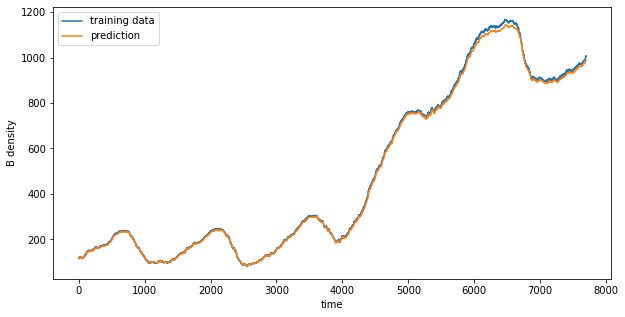

In [56]:
#training for B
regressor=Sequential()
regressor.add(LSTM(units=n,return_sequences=True,input_shape=(train_Bx.shape[1],train_Bx.shape[2])))
regressor.add(Dropout(0.05))
regressor.add(LSTM(units=n))
regressor.add(Dropout(0.05))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(train_Bx,train_By,epochs=1,batch_size=30)
regressor.save('B_model.h5')
model=load_model("B_model.h5")
predicted_values=model.predict(train_Bx)
plt.plot(train_By,label="training data")
plt.plot(predicted_values,label="prediction")
temp1=[]
temp2=[]
temp2 = [number*N[1] for number in train_By]
predicted_values=model.predict(train_Bx)
temp1 = [number*N[1] for number in predicted_values]
temp1=[np.round(number) for number in temp1]
plt.figure(figsize=(10,5))
plt.plot(temp2,label="training data")
plt.plot(temp1,label="prediction")
plt.legend()
plt.xlabel("time")
plt.ylabel("B density")

257/257 [==============================] - 401s 2s/step - loss: 0.0727


Text(0, 0.5, 'C density')

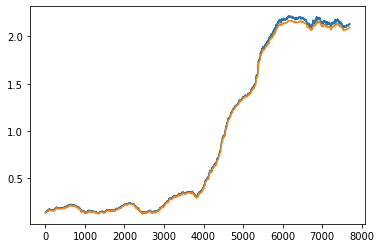

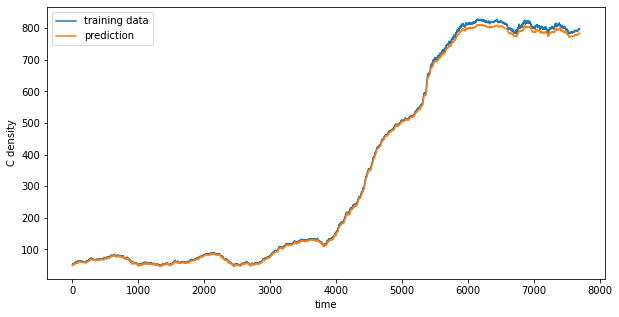

In [57]:
#training for C
regressor=Sequential()
regressor.add(LSTM(units=n,return_sequences=True,input_shape=(train_Cx.shape[1],train_Cx.shape[2])))
regressor.add(Dropout(0.05))
regressor.add(LSTM(units=n))
regressor.add(Dropout(0.05))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(train_Cx,train_Cy,epochs=1,batch_size=30)
regressor.save('C_model.h5')
model=load_model("C_model.h5")
predicted_values=model.predict(train_Cx)
plt.plot(train_Cy,label="training data")
plt.plot(predicted_values,label="prediction")
temp1=[]
temp2=[]
temp2 = [number*N[2] for number in train_Cy]
predicted_values=model.predict(train_Cx)
temp1 = [number*N[2] for number in predicted_values]
temp1=[np.round(number) for number in temp1]
plt.figure(figsize=(10,5))
plt.plot(temp2,label="training data")
plt.plot(temp1,label="prediction")
plt.legend()
plt.xlabel("time")
plt.ylabel("C density")

257/257 [==============================] - 404s 2s/step - loss: 0.0970


Text(0, 0.5, 'D density')

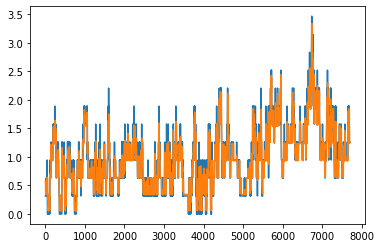

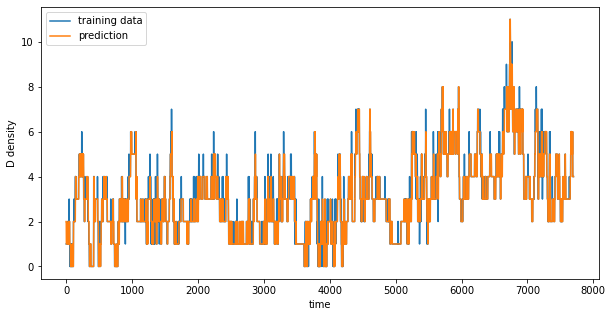

In [58]:
#training for D
regressor=Sequential()
regressor.add(LSTM(units=n,return_sequences=True,input_shape=(train_Dx.shape[1],train_Dx.shape[2])))
regressor.add(Dropout(0.05))
regressor.add(LSTM(units=n))
regressor.add(Dropout(0.05))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(train_Dx,train_Dy,epochs=1,batch_size=30)
regressor.save('D_model.h5')
model=load_model("D_model.h5")
predicted_values=model.predict(train_Dx)
plt.plot(train_Dy,label="training data")
plt.plot(predicted_values,label="prediction")
temp1=[]
temp2=[]
temp2 = [number*N[3] for number in train_Dy]
predicted_values=model.predict(train_Dx)
temp1 = [number*N[3] for number in predicted_values]
temp1=[np.round(number) for number in temp1]
plt.figure(figsize=(10,5))
plt.plot(temp2,label="training data")
plt.plot(temp1,label="prediction")
plt.legend()
plt.xlabel("time")
plt.ylabel("D density")

257/257 [==============================] - 246s 945ms/step - loss: 0.0650


Text(0, 0.5, 'E density')

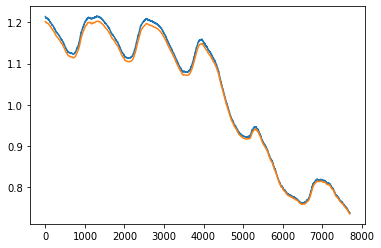

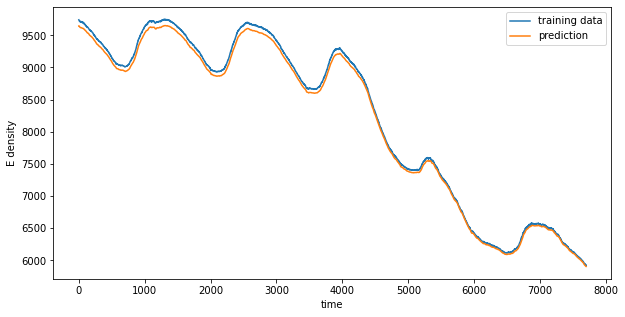

In [59]:
#training for E
regressor=Sequential()
regressor.add(LSTM(units=n,return_sequences=True,input_shape=(train_Ex.shape[1],train_Ex.shape[2])))
regressor.add(Dropout(0.05))
regressor.add(LSTM(units=n))
regressor.add(Dropout(0.05))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(train_Ex,train_Ey,epochs=1,batch_size=30)
regressor.save('E_model.h5')
model=load_model("E_model.h5")
predicted_values=model.predict(train_Ex)
plt.plot(train_Ey,label="training data")
plt.plot(predicted_values,label="prediction")
temp1=[]
temp2=[]
temp2 = [number*N[4] for number in train_Ey]
predicted_values=model.predict(train_Ex)
temp1 = [number*N[4] for number in predicted_values]
temp1=[np.round(number) for number in temp1]
plt.figure(figsize=(10,5))
plt.plot(temp2,label="training data")
plt.plot(temp1,label="prediction")
plt.legend()
plt.xlabel("time")
plt.ylabel("E density")

257/257 [==============================] - 246s 950ms/step - loss: 0.0555


Text(0, 0.5, 'F density')

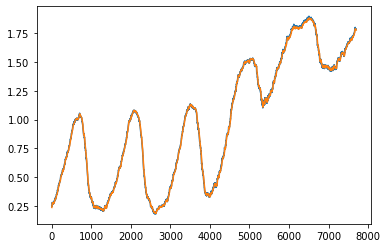

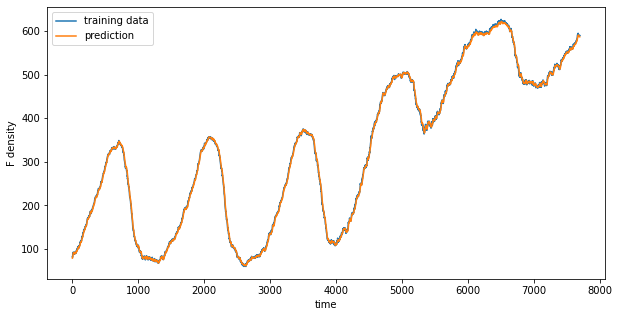

In [60]:
#training for F
regressor=Sequential()
regressor.add(LSTM(units=n,return_sequences=True,input_shape=(train_Fx.shape[1],train_Fx.shape[2])))
regressor.add(Dropout(0.05))
regressor.add(LSTM(units=n))
regressor.add(Dropout(0.05))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(train_Fx,train_Fy,epochs=1,batch_size=30)
regressor.save('F_model.h5')
model=load_model("F_model.h5")
predicted_values=model.predict(train_Fx)
plt.plot(train_Fy,label="training data")
plt.plot(predicted_values,label="prediction")
temp1=[]
temp2=[]
temp2 = [number*N[5] for number in train_Fy]
predicted_values=model.predict(train_Fx)
temp1 = [number*N[5] for number in predicted_values]
temp1=[np.round(number) for number in temp1]
plt.figure(figsize=(10,5))
plt.plot(temp2,label="training data")
plt.plot(temp1,label="prediction")
plt.legend()
plt.xlabel("time")
plt.ylabel("F density")

257/257 [==============================] - 246s 948ms/step - loss: 0.0754


Text(0, 0.5, 'G density')

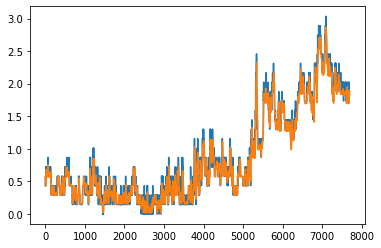

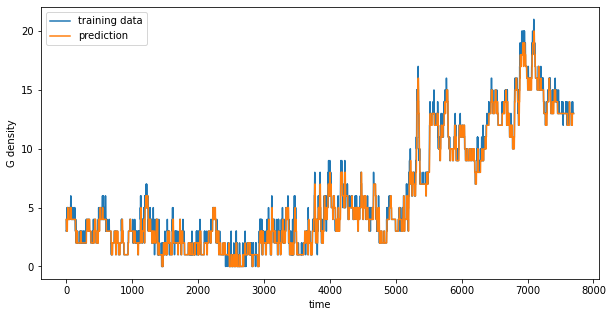

In [61]:
#training for G
regressor=Sequential()
regressor.add(LSTM(units=n,return_sequences=True,input_shape=(train_Gx.shape[1],train_Gx.shape[2])))
regressor.add(Dropout(0.05))
regressor.add(LSTM(units=n))
regressor.add(Dropout(0.05))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(train_Gx,train_Gy,epochs=1,batch_size=30)
regressor.save('G_model.h5')
model=load_model("G_model.h5")
predicted_values=model.predict(train_Gx)
plt.plot(train_Gy,label="training data")
plt.plot(predicted_values,label="prediction")
temp1=[]
temp2=[]
temp2 = [number*N[6] for number in train_Gy]
predicted_values=model.predict(train_Gx)
temp1 = [number*N[6] for number in predicted_values]
temp1=[np.round(number) for number in temp1]
plt.figure(figsize=(10,5))
plt.plot(temp2,label="training data")
plt.plot(temp1,label="prediction")
plt.legend()
plt.xlabel("time")
plt.ylabel("G density")

257/257 [==============================] - 247s 951ms/step - loss: 0.0555


Text(0, 0.5, 'H density')

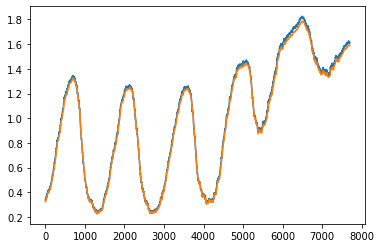

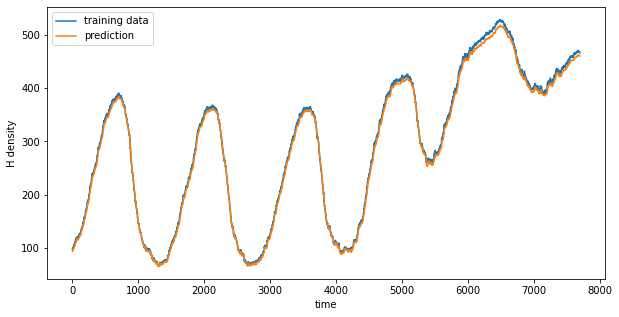

In [62]:
#training for H
regressor=Sequential()
regressor.add(LSTM(units=n,return_sequences=True,input_shape=(train_Hx.shape[1],train_Hx.shape[2])))
regressor.add(Dropout(0.05))
regressor.add(LSTM(units=n))
regressor.add(Dropout(0.05))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(train_Hx,train_Hy,epochs=1,batch_size=30)
regressor.save('H_model.h5')
model=load_model("H_model.h5")
predicted_values=model.predict(train_Hx)
plt.plot(train_Hy,label="training data")
plt.plot(predicted_values,label="prediction")
temp1=[]
temp2=[]
temp2 = [number*N[7] for number in train_Hy]
predicted_values=model.predict(train_Hx)
temp1 = [number*N[7] for number in predicted_values]
temp1=[np.round(number) for number in temp1]
plt.figure(figsize=(10,5))
plt.plot(temp2,label="training data")
plt.plot(temp1,label="prediction")
plt.legend()
plt.xlabel("time")
plt.ylabel("H density")

257/257 [==============================] - 258s 995ms/step - loss: 0.0826


Text(0, 0.5, 'I density')

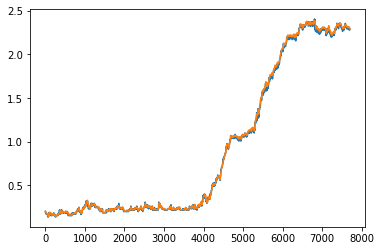

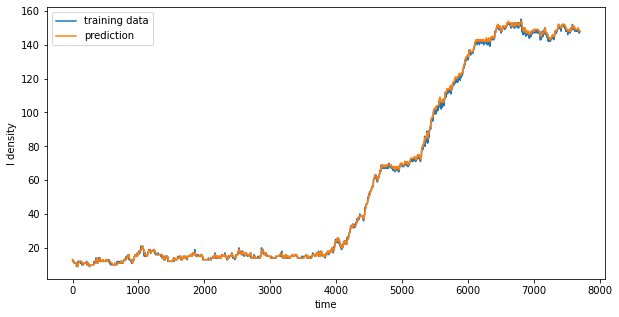

In [63]:
#training for I
regressor=Sequential()
regressor.add(LSTM(units=n,return_sequences=True,input_shape=(train_Ix.shape[1],train_Ix.shape[2])))
regressor.add(Dropout(0.05))
regressor.add(LSTM(units=n))
regressor.add(Dropout(0.05))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(train_Ix,train_Iy,epochs=1,batch_size=30)
regressor.save('I_model.h5')
model=load_model("I_model.h5")
predicted_values=model.predict(train_Ix)
plt.plot(train_Iy,label="training data")
plt.plot(predicted_values,label="prediction")
temp1=[]
temp2=[]
temp2 = [number*N[8] for number in train_Iy]
predicted_values=model.predict(train_Ix)
temp1 = [number*N[8] for number in predicted_values]
temp1=[np.round(number) for number in temp1]
plt.figure(figsize=(10,5))
plt.plot(temp2,label="training data")
plt.plot(temp1,label="prediction")
plt.legend()
plt.xlabel("time")
plt.ylabel("I density")

0.0


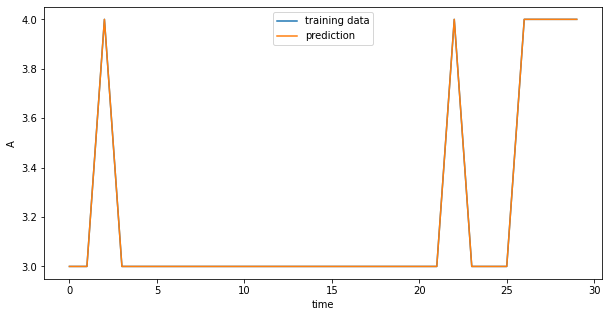

In [79]:
# modeling the next 30 min
#A
import math
import sklearn.metrics
model=load_model("A_model.h5")
predicted_series=[]
for i in range(30):
    temp=A[i+7700:i+8000] 
    temp=[number/N[0] for number in temp]
    temp=np.array(temp)
    temp=np.reshape(temp,(1,temp.shape[0],1))
    predicted_values_x=model.predict(temp)
    predicted_values_x = [number*N[0] for number in predicted_values_x]
    predicted_series.append(predicted_values_x)
predicted_series=np.array(predicted_series)
predicted_series=np.reshape(predicted_series,(predicted_series.shape[0],1))
predicted_series=[np.round(number) for number in predicted_series]
plt.figure(figsize=(10,5))
plt.plot(A[7999:8029],label="training data")
plt.ticklabel_format(useOffset=False)
plt.plot(predicted_series,label="prediction")
plt.legend()
plt.xlabel("time")
plt.ylabel("A")
mse = sklearn.metrics.mean_squared_error(A[7999:8029], predicted_series)
rmse = math.sqrt(mse)
print(rmse)


13.861216877797322


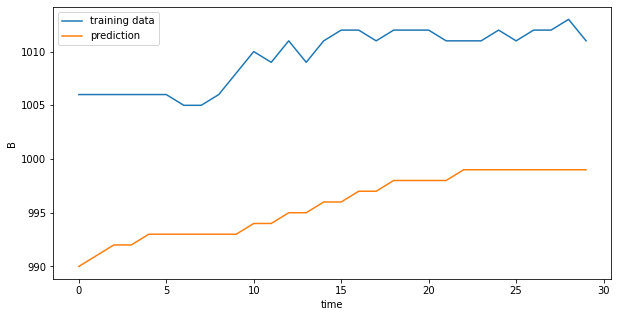

In [80]:
#B
model=load_model("B_model.h5")
predicted_series=[]
for i in range(30):
    temp=B[i+7700:i+8000] 
    temp=[number/N[1] for number in temp]
    temp=np.array(temp)
    temp=np.reshape(temp,(1,temp.shape[0],1))
    predicted_values_x=model.predict(temp)
    predicted_values_x = [number*N[1] for number in predicted_values_x]
    predicted_series.append(predicted_values_x)
predicted_series=np.array(predicted_series)
predicted_series=np.reshape(predicted_series,(predicted_series.shape[0],1))
predicted_series=[np.round(number) for number in predicted_series]
plt.figure(figsize=(10,5))
plt.plot(B[7999:8029],label="training data")
plt.ticklabel_format(useOffset=False)
plt.plot(predicted_series,label="prediction")
plt.legend()
plt.xlabel("time")
plt.ylabel("B")
mse = sklearn.metrics.mean_squared_error(B[7999:8029], predicted_series)
rmse = math.sqrt(mse)
print(rmse)

13.389050252600693


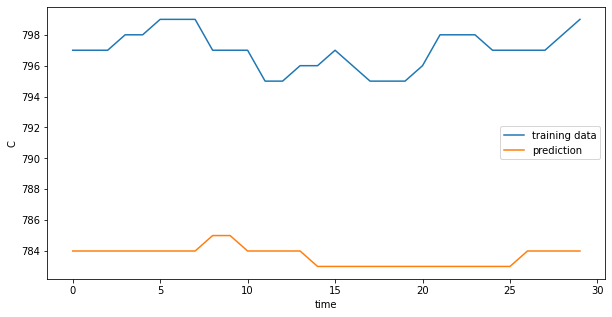

In [81]:
#C
model=load_model("C_model.h5")
predicted_series=[]
for i in range(30):
    temp=C[i+7700:i+8000] 
    temp=[number/N[2] for number in temp]
    temp=np.array(temp)
    temp=np.reshape(temp,(1,temp.shape[0],1))
    predicted_values_x=model.predict(temp)
    predicted_values_x = [number*N[2] for number in predicted_values_x]
    predicted_series.append(predicted_values_x)
predicted_series=np.array(predicted_series)
predicted_series=np.reshape(predicted_series,(predicted_series.shape[0],1))
predicted_series=[np.round(number) for number in predicted_series]
plt.figure(figsize=(10,5))
plt.plot(C[7999:8029],label="training data")
plt.ticklabel_format(useOffset=False)
plt.plot(predicted_series,label="prediction")
plt.legend()
plt.xlabel("time")
plt.ylabel("C")
mse = sklearn.metrics.mean_squared_error(C[7999:8029], predicted_series)
rmse = math.sqrt(mse)
print(rmse)

0.18257418583505536


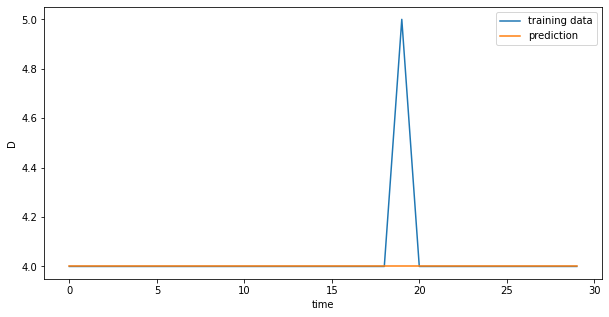

In [82]:
#D
model=load_model("D_model.h5")
predicted_series=[]
for i in range(30):
    temp=D[i+7700:i+8000] 
    temp=[number/N[3] for number in temp]
    temp=np.array(temp)
    temp=np.reshape(temp,(1,temp.shape[0],1))
    predicted_values_x=model.predict(temp)
    predicted_values_x = [number*N[3] for number in predicted_values_x]
    predicted_series.append(predicted_values_x)
predicted_series=np.array(predicted_series)
predicted_series=np.reshape(predicted_series,(predicted_series.shape[0],1))
predicted_series=[np.round(number) for number in predicted_series]
plt.figure(figsize=(10,5))
plt.plot(D[7999:8029],label="training data")
plt.ticklabel_format(useOffset=False)
plt.plot(predicted_series,label="prediction")
plt.legend()
plt.xlabel("time")
plt.ylabel("D")
mse = sklearn.metrics.mean_squared_error(D[7999:8029], predicted_series)
rmse = math.sqrt(mse)
print(rmse)

20.349447166937978


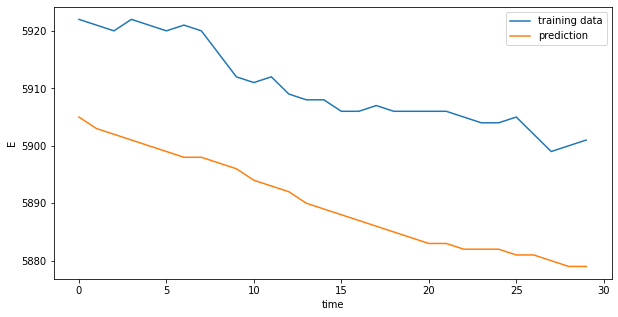

In [83]:
#E
model=load_model("E_model.h5")
predicted_series=[]
for i in range(30):
    temp=E[i+7700:i+8000] 
    temp=[number/N[4] for number in temp]
    temp=np.array(temp)
    temp=np.reshape(temp,(1,temp.shape[0],1))
    predicted_values_x=model.predict(temp)
    predicted_values_x = [number*N[4] for number in predicted_values_x]
    predicted_series.append(predicted_values_x)
predicted_series=np.array(predicted_series)
predicted_series=np.reshape(predicted_series,(predicted_series.shape[0],1))
predicted_series=[np.round(number) for number in predicted_series]
plt.figure(figsize=(10,5))
plt.plot(E[7999:8029],label="training data")
plt.ticklabel_format(useOffset=False)
plt.plot(predicted_series,label="prediction")
plt.legend()
plt.xlabel("time")
plt.ylabel("E")
mse = sklearn.metrics.mean_squared_error(E[7999:8029], predicted_series)
rmse = math.sqrt(mse)
print(rmse)

2.9552213679068666


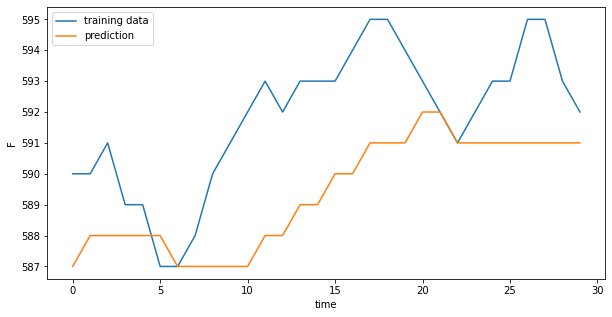

In [84]:
#F
model=load_model("F_model.h5")
predicted_series=[]
for i in range(30):
    temp=F[i+7700:i+8000] 
    temp=[number/N[5] for number in temp]
    temp=np.array(temp)
    temp=np.reshape(temp,(1,temp.shape[0],1))
    predicted_values_x=model.predict(temp)
    predicted_values_x = [number*N[5] for number in predicted_values_x]
    predicted_series.append(predicted_values_x)
predicted_series=np.array(predicted_series)
predicted_series=np.reshape(predicted_series,(predicted_series.shape[0],1))
predicted_series=[np.round(number) for number in predicted_series]
plt.figure(figsize=(10,5))
plt.plot(F[7999:8029],label="training data")
plt.ticklabel_format(useOffset=False)
plt.plot(predicted_series,label="prediction")
plt.legend()
plt.xlabel("time")
plt.ylabel("F")
mse = sklearn.metrics.mean_squared_error(F[7999:8029], predicted_series)
rmse = math.sqrt(mse)
print(rmse)

0.5477225575051661


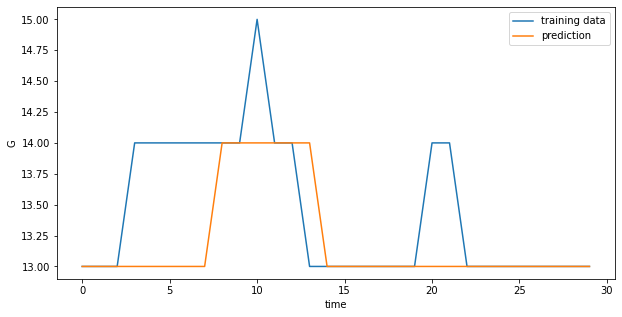

In [85]:
#G
model=load_model("G_model.h5")
predicted_series=[]
for i in range(30):
    temp=G[i+7700:i+8000] 
    temp=[number/N[6] for number in temp]
    temp=np.array(temp)
    temp=np.reshape(temp,(1,temp.shape[0],1))
    predicted_values_x=model.predict(temp)
    predicted_values_x = [number*N[6] for number in predicted_values_x]
    predicted_series.append(predicted_values_x)
predicted_series=np.array(predicted_series)
predicted_series=np.reshape(predicted_series,(predicted_series.shape[0],1))
predicted_series=[np.round(number) for number in predicted_series]
plt.figure(figsize=(10,5))
plt.plot(G[7999:8029],label="training data")
plt.ticklabel_format(useOffset=False)
plt.plot(predicted_series,label="prediction")
plt.legend()
plt.xlabel("time")
plt.ylabel("G")
mse = sklearn.metrics.mean_squared_error(G[7999:8029], predicted_series)
rmse = math.sqrt(mse)
print(rmse)

8.167006795638168


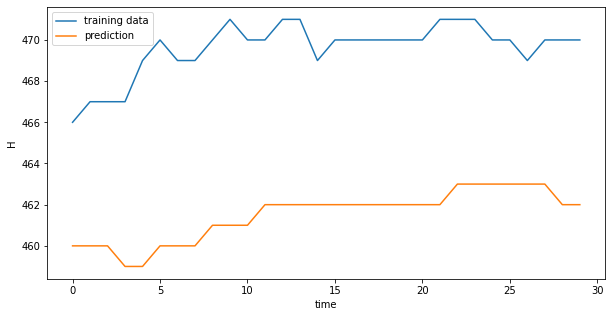

In [86]:
#H
model=load_model("H_model.h5")
predicted_series=[]
for i in range(30):
    temp=H[i+7700:i+8000] 
    temp=[number/N[7] for number in temp]
    temp=np.array(temp)
    temp=np.reshape(temp,(1,temp.shape[0],1))
    predicted_values_x=model.predict(temp)
    predicted_values_x = [number*N[7] for number in predicted_values_x]
    predicted_series.append(predicted_values_x)
predicted_series=np.array(predicted_series)
predicted_series=np.reshape(predicted_series,(predicted_series.shape[0],1))
predicted_series=[np.round(number) for number in predicted_series]
plt.figure(figsize=(10,5))
plt.plot(H[7999:8029],label="training data")
plt.ticklabel_format(useOffset=False)
plt.plot(predicted_series,label="prediction")
plt.legend()
plt.xlabel("time")
plt.ylabel("H")
mse = sklearn.metrics.mean_squared_error(H[7999:8029], predicted_series)
rmse = math.sqrt(mse)
print(rmse)

0.8563488385776752


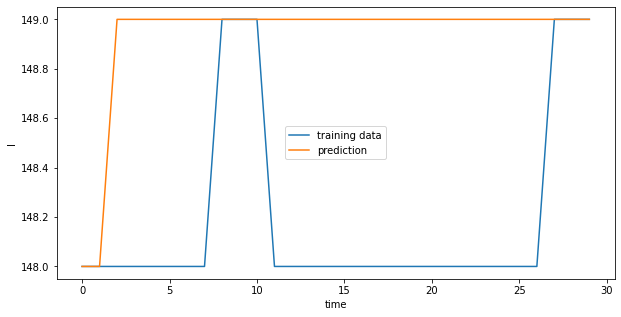

In [87]:
#I
model=load_model("I_model.h5")
predicted_series=[]
for i in range(30):
    temp=I[i+7700:i+8000] 
    temp=[number/N[8] for number in temp]
    temp=np.array(temp)
    temp=np.reshape(temp,(1,temp.shape[0],1))
    predicted_values_x=model.predict(temp)
    predicted_values_x = [number*N[8] for number in predicted_values_x]
    predicted_series.append(predicted_values_x)
predicted_series=np.array(predicted_series)
predicted_series=np.reshape(predicted_series,(predicted_series.shape[0],1))
predicted_series=[np.round(number) for number in predicted_series]
plt.figure(figsize=(10,5))
plt.plot(I[7999:8029],label="training data")
plt.ticklabel_format(useOffset=False)
plt.plot(predicted_series,label="prediction")
plt.legend()
plt.xlabel("time")
plt.ylabel("I")
mse = sklearn.metrics.mean_squared_error(I[7999:8029], predicted_series)
rmse = math.sqrt(mse)
print(rmse)